In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

In [5]:
mallcust_df = pd.read_csv('../../dataset/csv/Mall_Customers.csv').set_index('CustomerID')
mallcust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
mallcust_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

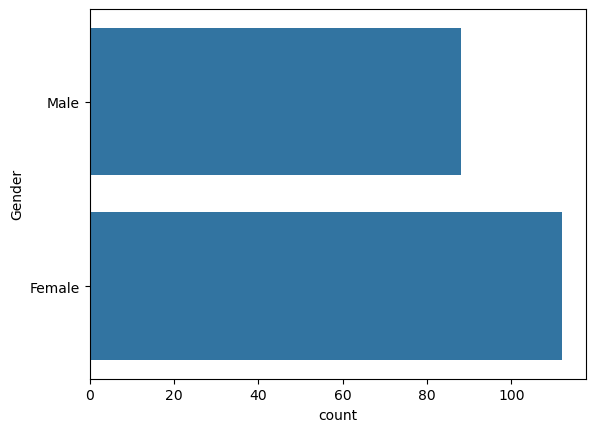

In [7]:
sns.countplot(mallcust_df['Gender'])

In [8]:
# A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. 
# It combines both histogram and scatter plots, providing a unique overview of the dataset’s distributions and correlations. 
# The primary purpose of a pair plot is to simplify the initial stages of data analysis by offering a comprehensive snapshot of potential relationships within the data.
# Observe linear or nonlinear relationships between variables.


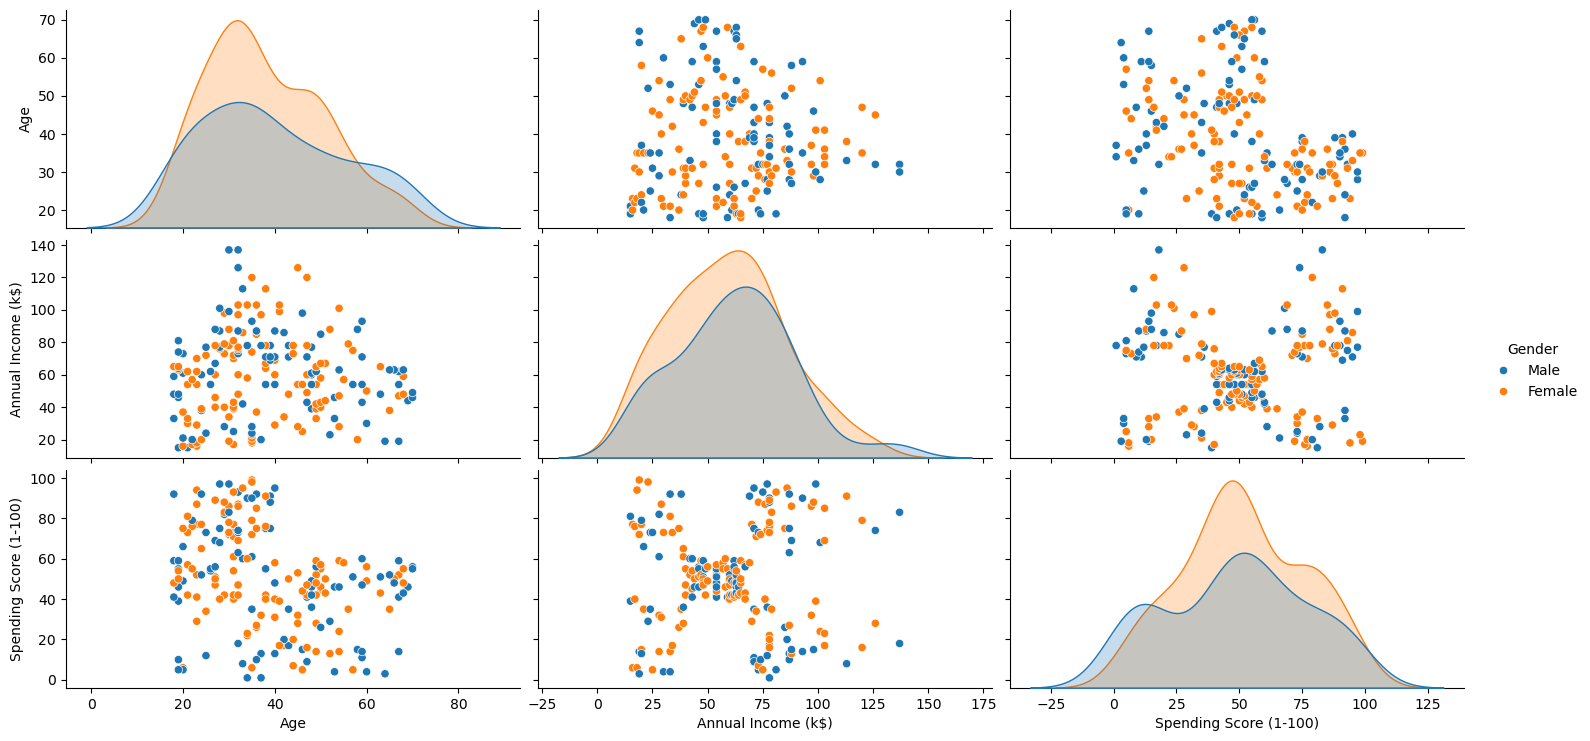

In [9]:
sns.pairplot(mallcust_df, hue = 'Gender', aspect=2)

In [10]:
# gender has no direct relation to segmenting customers. 

In [11]:
col_cluster = mallcust_df.drop('Gender', axis=1).columns
col_cluster

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
#Relation between Age , Annual Income and Spending Score

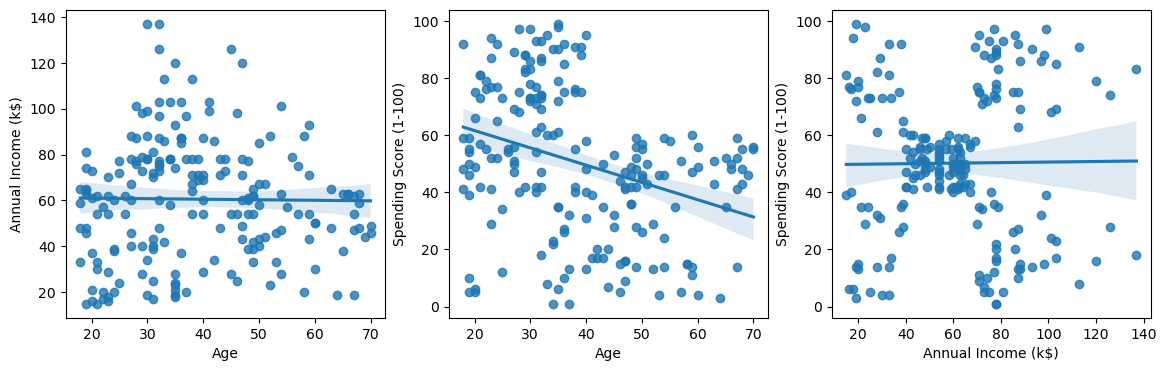

In [13]:
plt.figure(figsize=(14, 4))
n = 1
for x in col_cluster[:2]:
    for y in col_cluster[1:]:
        if x != y :
            plt.subplot(1, 3, n)
            sns.regplot(x=x, y=y, data=mallcust_df)
            n += 1
plt.show()

In [14]:
X_df = mallcust_df.drop('Gender', axis=1)
X_df.rename(columns={'Annual Income (k$)' : 'AnnualIncome',
                    'Spending Score (1-100)' : 'SpendingScore'}, inplace= True)
X_df.head()

,Age,AnnualIncome,SpendingScore
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


# KMeans

In [13]:
sse = [] #sum of squared error
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_df)
    sse.append(kmeans.inertia_)

In [14]:
import numpy as np

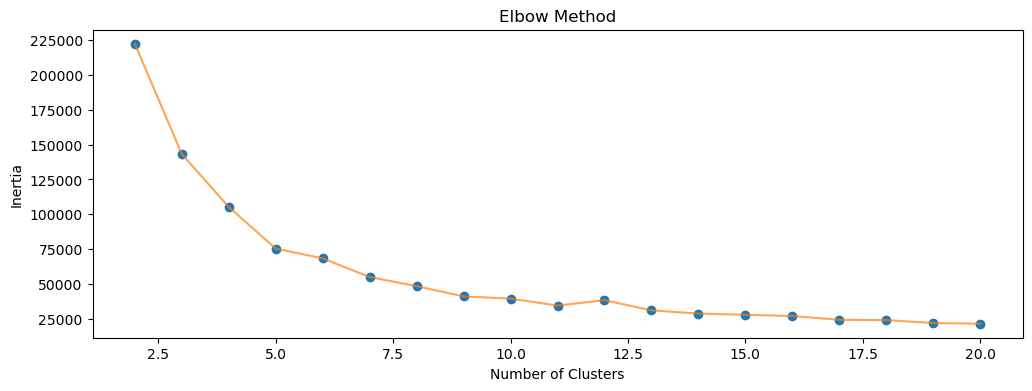

In [15]:
plt.figure(figsize = (12 ,4))
plt.plot(np.arange(2 , 21) , sse , 'o')
plt.plot(np.arange(2 , 21) , sse , '-' , alpha = 0.7)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

In [16]:
kmeans_5 = KMeans(n_clusters=5).fit(X_df)

X_df['Label'] = kmeans_5.labels_
centers = kmeans_5.cluster_centers_

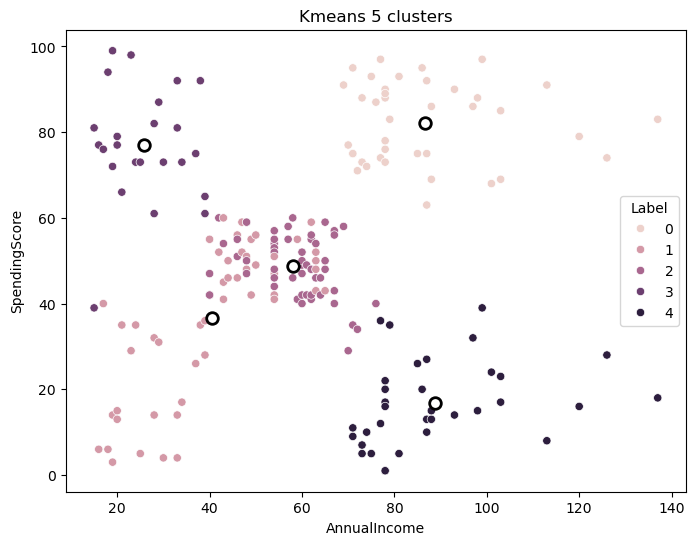

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome',y='SpendingScore', hue='Label', data=X_df)
# plt.scatter(X_df['AnnualIncome'], X_df['SpendingScore'])
plt.scatter(centers[:, 1], centers[:, 2], c='w', edgecolors='k', linewidth= 2, s=70)
plt.title('Kmeans 5 clusters')
plt.show()

# Silhoutte Score

In [18]:
# hanya jika ada label dan diambil skor tertinggi

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
sse = [] #sum of squared error
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_df)
    siluet = silhouette_score(X_df, kmeans.labels_, metric= 'euclidean')
    sse.append(siluet)

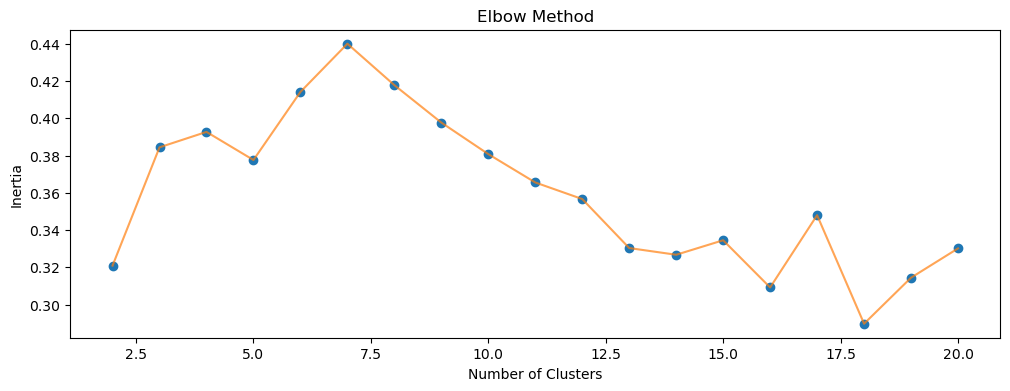

In [21]:
plt.figure(figsize = (12 ,4))
plt.plot(np.arange(2 , 21) , sse , 'o')
plt.plot(np.arange(2 , 21) , sse , '-' , alpha = 0.7)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

# DBSCAN

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y =make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

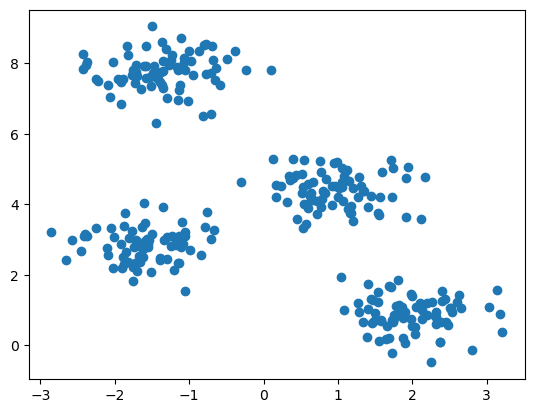

In [5]:
plt.scatter(X[:,0], X[:, 1])

In [78]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels 

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3,  1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3,  1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1,  0,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1,  0,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1,  3,  1,  3,  0,  1,  0,  0,  0,  1,  0,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
        1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2,  2,  1,  0,
        2,  2,  3,  2,  3

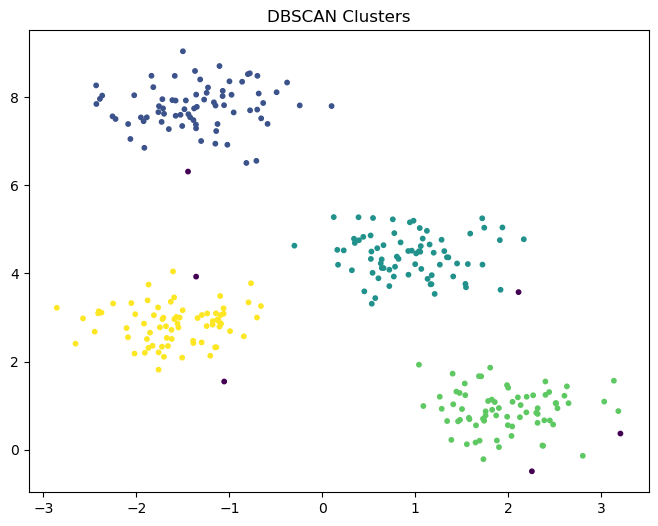

In [79]:
plt.figure(figsize=(8, 6))
# sns.scatterplot(x='AnnualIncome',y='SpendingScore', hue=dbscan_labels, data=X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=10)
plt.title('DBSCAN Clusters')
plt.show()

# Agglomerative Hierarcial Clustering

In [13]:
ahc = AgglomerativeClustering(n_clusters=4)

ahc_labels = ahc.fit_predict(X)

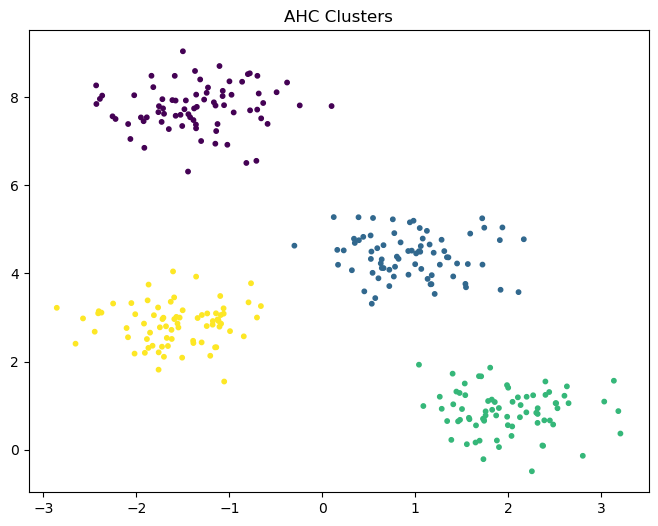

In [14]:
plt.figure(figsize=(8, 6))
# sns.scatterplot(x='AnnualIncome',y='SpendingScore', hue=dbscan_labels, data=X)
plt.scatter(X[:, 0], X[:, 1], c=ahc_labels, s=10)
plt.title('AHC Clusters')
plt.show()

In [11]:
sclust = SpectralClustering(n_clusters=4, gamma=100)

sclust_labels = sclust.fit_predict(X)

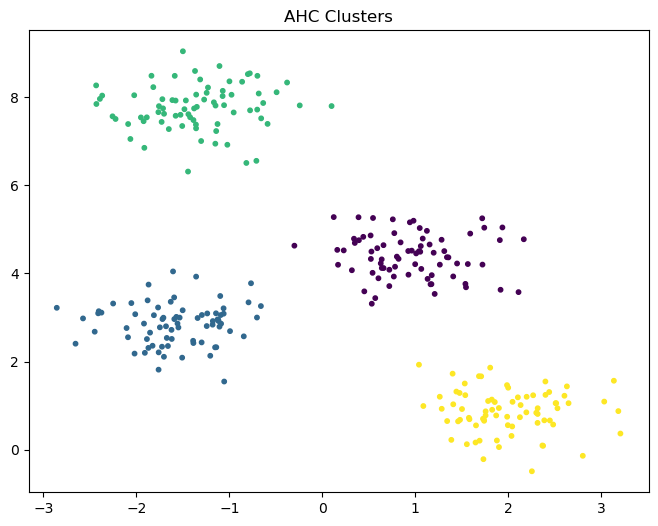

In [12]:
plt.figure(figsize=(8, 6))
# sns.scatterplot(x='AnnualIncome',y='SpendingScore', hue=dbscan_labels, data=X)
plt.scatter(X[:, 0], X[:, 1], c=sclust_labels, s=10)
plt.title('AHC Clusters')
plt.show()

# Scipy

In [1]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [6]:
l = linkage(X)

In [7]:
maxclust_labels = fcluster(l, 4, criterion='maxclust')
maxclust_labels

array([2, 1, 3, 1, 2, 2, 4, 3, 1, 1, 4, 1, 3, 1, 2, 3, 3, 2, 4, 4, 2, 2,
       3, 4, 4, 3, 2, 3, 4, 3, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 3, 4, 3, 3,
       4, 4, 1, 4, 1, 2, 4, 2, 1, 2, 2, 4, 1, 4, 1, 2, 1, 3, 1, 4, 4, 4,
       1, 2, 1, 4, 3, 4, 1, 4, 4, 1, 4, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 4, 4, 3, 2, 2, 3, 4, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       4, 4, 2, 1, 2, 3, 1, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 1, 4,
       4, 2, 1, 4, 4, 1, 3, 1, 1, 4, 3, 4, 3, 4, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 4, 1, 4, 2, 3, 1, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 1, 2, 3, 4, 1,
       2, 2, 3, 4, 2, 3, 4, 4, 3, 3, 3, 3, 2, 1, 3, 4, 3, 3, 4, 4, 4, 3,
       4, 1, 3, 4, 2, 4, 3, 1, 4, 1, 3, 1, 3, 4, 3, 3, 1, 4, 4, 2, 2, 3,
       1, 2, 2, 4, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 4, 3, 2, 4, 1, 4, 2, 3,
       2, 1, 1, 1, 1, 4, 4, 1, 3, 4, 2, 3, 4, 4, 4, 2, 2, 1, 3, 3, 4, 2,
       1, 4, 3, 1, 3, 2, 2, 4, 4, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 4, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 4], d

In [16]:
distance_labels = fcluster(l, 0.9, criterion='distance')
distance_labels

array([2, 1, 3, 1, 2, 2, 4, 3, 1, 1, 4, 1, 3, 1, 2, 3, 3, 2, 4, 4, 2, 2,
       3, 4, 4, 3, 2, 3, 4, 3, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 3, 4, 3, 3,
       4, 4, 1, 4, 1, 2, 4, 2, 1, 2, 2, 4, 1, 4, 1, 2, 1, 3, 1, 4, 4, 4,
       1, 2, 1, 4, 3, 4, 1, 4, 4, 1, 4, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 4, 4, 3, 2, 2, 3, 4, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       4, 4, 2, 1, 2, 3, 1, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 1, 4,
       4, 2, 1, 4, 4, 1, 3, 1, 1, 4, 3, 4, 3, 4, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 4, 1, 4, 2, 3, 1, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 1, 2, 3, 4, 1,
       2, 2, 3, 4, 2, 3, 4, 4, 3, 3, 3, 3, 2, 1, 3, 4, 3, 3, 4, 4, 4, 3,
       4, 1, 3, 4, 2, 4, 3, 1, 4, 1, 3, 1, 3, 4, 3, 3, 1, 4, 4, 2, 2, 3,
       1, 2, 2, 4, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 4, 3, 2, 4, 1, 4, 2, 3,
       2, 1, 1, 1, 1, 4, 4, 1, 3, 4, 2, 3, 4, 4, 4, 2, 2, 1, 3, 3, 4, 2,
       1, 4, 3, 1, 3, 2, 2, 4, 4, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 4, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 4], d

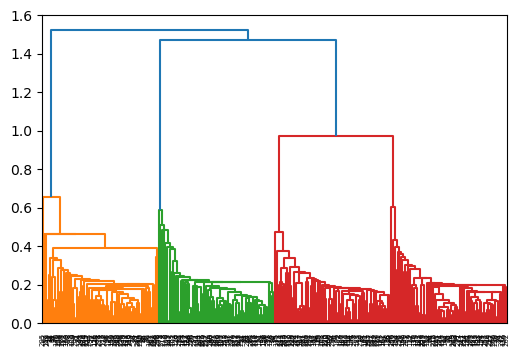

In [13]:
plt.figure(figsize=(6, 4))
dendrogram(l);